<center><img src="https://editor.analyticsvidhya.com/uploads/46151Deep_Learning_Software_DE_1380x735px_1150x_.png" width=50% ></center>

# <center> Lab Project Part 2: Image Classification using Convolutional Neural Networks </center>
<center> Computer Vision 1, University of Amsterdam </center>
<center> Due 23:59, October 21, 2023 (Amsterdam time) </center>

***

<center>
<b>TA's: Xiaoyan Xing, Vladimir Yugay, Luca Pantea</b>

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )
</center>

# **Instructions**

1. Students are expected to prepare a report covering both sections of this assignment. The report should include answers to all questions, written details on implementation approaches, the analysis of the results for different settings and visualizations to illustrate experiments with and performance of your implementation. Grading will primarily be based on the report (i.e. it should be self-contained as much as possible). If the report contains any faulty results or ambiguities, the TA's can take a look at your code to find out what happened.

2. Do not just provide numbers without explanation, remember to follow the general guidelines and discuss different settings to show you understand the material and the processes at work.

3. This part of the Final Lab contains an *optional* bonus challenge. See section 3 below.

**Hint:** Having visual elements such as charts, graphs and plots are always useful for everyone. Keep this in mind while writing your reports.


# **General Guidelines**
1. **Aim**:
     - Able to understand Image Recognition/Classification using Convolutional Neural Networks.
     - Get familiar with PyTorch, widely used Deep Learning framework
2. **Prerequisites**:
     - Familiarity with Python and relevant packages.
     - Know the basics of feature descriptors (SIFT, HoG) and machine learning tools (K-means, SVM and etc.).
3. **Guidelines**:
    Students should work on the assignments in their assignment group for **two** weeks.

    Any questions regarding the assignment content can be discussed on Piazza.
    
    Your source code and report must be handed in together in a zip file (**ID1_ID2_ID3_part2.zip**) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages for this part is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given instructions and answer all given questions. **Briefly describe what you implemented for each question in the report**.*
    - *Show you understand the algorithms and implementations: explain why certain settings produce certain results. When constructing graphs, tables and other figures, make your figures as informative as possible (choose relevant sample sizes, axes, etc.), to illustrate your arguments*
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*

4. The report should be handed in in **PDF-format**. Your code should be handed in in **.ipynb format** (Jupyter Notebook). This does not mean you have to make your project in a notebook, it just means it **should be submitted as a notebook**. This means that you can, for example, have separate python files in which you declare your classes/methods, but **_you will have to initialize/call these in the final notebook before you submit_**. Be sure to test whether all your functionality works as expected when ran in a notebook (**Before submission, go in the `Kernel` tab and press `Restart & Run All`**). If you use a Conda environment, be sure to include it in your submission.

5. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.

6. **Plagiarism note**: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of ChatGPT and other generative AI tools.

<!-- ### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** We recommend installing \textit{anaconda} for configuring \textit{python} package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***:} What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

#  **Introduction**

This part of the assignment makes use of Convolutional Neural Networks (CNN's). The previous part makes use of hand-crafted features like SIFT to represent images, then trains a classifier on top of them. In this way, learning is a two-step procedure with image representation and learning. The method used here instead *learns* the features jointly with the classification. Training CNNs roughly consists of three parts:
1. Creating the network architecture

2. Preprocessing the data

3. Feeding the data to the network, and updating the parameters.

Please follow the instructions and finish the below tasks. (**Note:**  you are allowed to change the provided code.)

# **Section 1: Image Classifiation on CIFAR-100**
### 1.1 Install pytorch and run the given code

First of all, you need to install PyTorch and relevant packages. In this part, we will use [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) as the training and testing dataset.

In [42]:
#####################################################
# referenced code: https://pytorch.org/tutorials/
# referenced code: http://cs231n.stanford.edu/
# referenced code: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import pickle
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import os 
from PIL import Image

from torch.utils.data import DataLoader, random_split, Dataset

In [26]:
# Added to allow for faster computations on M1/M2 Macbooks

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [27]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby','bear', 'beaver','bed','bee','beetle','bicycle','bottle', 'bowl','boy','bridge', 'bus','butterfly', 'camel','can','castle','caterpillar','cattle',
 'chair','chimpanzee','clock','cloud', 'cockroach','couch', 'cra','crocodile', 'cup','dinosaur','dolphin', 'elephant','flatfish', 'forest', 'fox','girl', 'hamster', 'house','kangaroo','keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion','lizard','lobster', 'man','maple_tree','motorcycle', 'mountain', 'mouse','mushroom','oak_tree', 'orange','orchid', 'otter', 'palm_tree','pear', 'pickup_truck','pine_tree',
'plain', 'plate', 'poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea', 'seal', 'shark','shrew', 'skunk','skyscraper', 'snail','snake','spider',
'squirrel', 'streetcar', 'sunflower','sweet_pepper', 'table','tank','telephone', 'television', 'tiger','tractor','train','trout', 'tulip', 'turtle','wardrobe', 'whale', 'willow_tree','wolf', 'woman','worm')

Files already downloaded and verified


####  **` Q1.1: Test dataloader and show the images of each class  of CIFAR-100 (3-pts)`**  
You need to run and modify the given code and **show** the example images of CIFAR-100, **describe** the classes and images of CIFAR-100. (Please visualize at least one picture for the classes of labels from 0 to 4.) (3-*pts*)

In [28]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

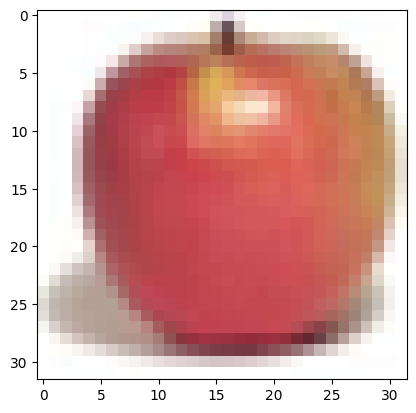

Label 0: apple


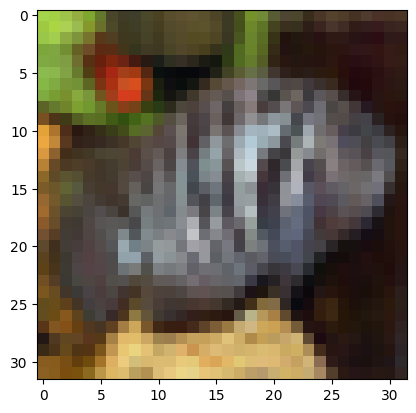

Label 1: aquarium_fish


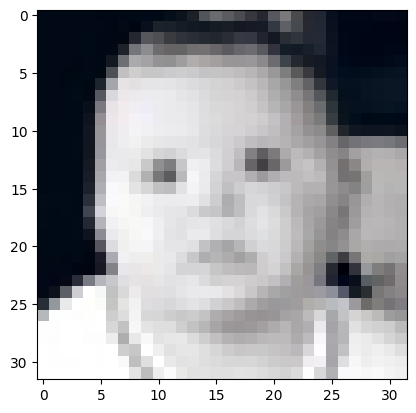

Label 2: baby


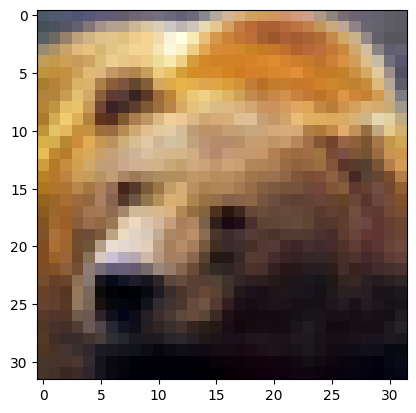

Label 3: bear


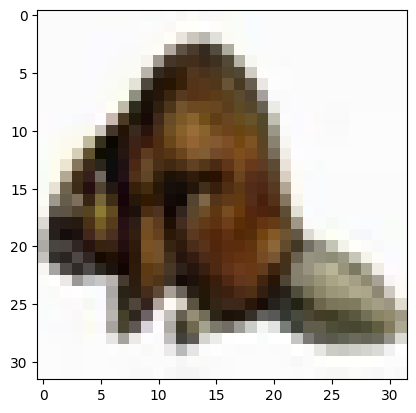

Label 4: beaver


In [ ]:
# Creating a dictionary to store a sample image for each label from 0 to 4.
label_image_dict = {i: None for i in range(5)}

# Iterating through the data until we find at least one image for each class from 0 to 4.
for images, labels in trainloader:
  
    for i in range(len(labels)):
        if labels[i].item() in label_image_dict and label_image_dict[labels[i].item()] is None:
            label_image_dict[labels[i].item()] = images[i]
            
    # Check if we have found all needed samples, then break the loop.
    if all(v is not None for v in label_image_dict.values()):
        break

# Display the images and print the labels.
for label, image in label_image_dict.items():
    imshow(image)
    print(f'Label {label}: {classes[label]}')



### 1.2 Architecture understanding

In this section, we provide templates for two classes inheriting from the PyTorch superclass [*nn.Module*](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) (the base class for all neural network modules). One is an ordinary two-layer network (*TwolayerNet*) with fully connected layers and ReLu, and the other is a Convolutional Network (*ConvNet*) utilizing the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791).

**Note**: you are allowed to change the provided function definitions.

####  **`Q1.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet (4-pts).`**

1. Complement the architecture of *TwolayerNet* class, and complement the architecture of *ConvNet* class using the structure of LeNet-5. (2-*pts*)
2. Since you need to feed color images into these two networks, what's the kernel size of the first convolutional layer in *ConvNet*? and how many trainable parameters are there in "F6" layer (given the calculation process)? (2-*pts*)

In [30]:
class TwoLayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self, input_size, hidden_size, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size:
        :param num_classes:
        '''
        super(TwoLayerNet, self).__init__()
        ################################
        # Todo: finish the code
        ################################
        
         # First fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size) 

        # Initialize weights using Kaiming initialization for ReLU activation
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        
        # Second fully connected layer that outputs the scores
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        # Initialize weights using Kaiming initialization for ReLU activation
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')
        
            
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

In [31]:
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
       
        
        # Convolutional Layer 1: (Input: 32x32x3)
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        # Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Convolutional Layer 2: (Input: 14x14x6 after pooling)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        # Fully Connected Layer 1: (Input: 5x5x16 after pooling)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Fully Connected Layer 2:
        self.fc2 = nn.Linear(120, 84)
        # Output Layer
        self.fc3 = nn.Linear(84, num_classes)
        
        
    def forward(self, x):
        ################################
        # Todo: finish the code
        ################################
        
        # Apply first convolution -> ReLU -> Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        
        # Apply second convolution -> ReLU -> Max pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        
        # Flatten the tensor
        x = x.view(x.size(0), -1)
        
        # Apply fully connected layers with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Final Classification Layer
        x = self.fc3(x)
        
        return x

### 1.3 Preparation of training

In above section, we use the *CIFAR-100* dataset class from *torchvision.utils* provided by PyTorch. Whereas in most cases, you need to prepare the dataset yourself. One of the ways is to create a *dataset* class yourself and then use the *DataLoader* to make it iterable. After preparing the training and testing data, you also need to define the transform function for data augmentation and optimizer for parameter updating.

####  **` Q1.3: Preparation of training. Create the Dataloader class, define the transform function and the optimizer.(8-pts)`**  
1. Complement the *CIFAR100\_loader* (2-pts)
2. Complement the *Transform* function and the *Optimizer* (2-pts)
3. Train the *TwolayerNet* and *ConvNet* with *CIFAR100\_loader*, *Transform* and *Optimizer* you implemented and compare the results (4-pts)

##### *` Complement the CIFAR100_loader class (2-pts)`*

In [40]:
###  suggested reference: https://pytorch.org/tutorials/
# recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image

class CIFAR100_loader(torch.utils.data.Dataset):
    def __init__(self, root, train=True, transform=None):
        '''CIFAR-100 dataset loader'''
        ################################
        # Todo: finish the code
        ################################
        
        self.root = root
        self.train = train
        self.transform = transform

        # Depending on train or test load different data
        
        self.data = []
        self.targets = []

        if self.train:
            data_path = os.path.join(self.root, "train")
        else:
            data_path = os.path.join(self.root, "test")
            

        # load data 
        
        with open(data_path, 'rb') as f:
            
            entry = pickle.load(f, encoding='latin1')  # adjust if you stored your data differently
            self.data.append(entry['data'])
            
            if 'labels' in entry:
                self.targets.extend(entry['labels'])
            else:
                self.targets.extend(entry['fine_labels'])

        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC
        
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]

        # to PIL Image
        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, target

##### *` Complement the Transform function and the Optimizer (2-pts)`*

In [33]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Crop the image with padding
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
])

transform_test = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
])


##### *` Train the TwolayerNet and ConvNet with CIFAR100_loader, transform and optimizer you implemented and compare the results (4-pts)`*

In [34]:
def valid(net, testloader):
    net.eval()
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy of the network on the 10000 test images: %d %%' % (accuracy))
    return accuracy

In [49]:
def valid_class(net, testloader, classes):
    net.eval()
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_correct = list(0. for _ in range(len(classes)))
    class_total = list(0. for _ in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [45]:
def train(net, train_loader, epochs=100):
    # Determine the device to use
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'Training on {device}')

    # Move the network to the device
    net.to(device)

    ################################
    # Todo: finish the code
    ################################
    
    # Define a Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    

    # Training
    net.train()
    
    for epoch in range(epochs):  
        net.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()   # zero the parameter gradients

            outputs = net(inputs)   # forward
            loss = criterion(outputs, labels)  # loss
            loss.backward()  # backward
            optimizer.step()  # optimize

            running_loss += loss.item()
            if i % 200 == 199:  # print every 200 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
                running_loss = 0.0

        # Optional: Update learning rate if using learning rate scheduler
        # scheduler.step()


    print('Finished Training')
    
    return net

*Initialize the datasets*

In [43]:
# Datasets
train_set = CIFAR100_loader('./data/cifar-100-python', True, transform_train)
test_set = CIFAR100_loader('./data/cifar-100-python', False, transform_test)

# Initialize the dataloaders
train_data_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)
test_data_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)

*Train the TwolayerNet network*

In [46]:
################################
# Todo: finish the code
################################

two_layer_net = TwoLayerNet(input_size=3*32*32, hidden_size=500, num_classes=100)
two_layer_net = train(two_layer_net, train_data_loader, epochs=100)


Training on mps
[1,   200] loss: 4.533
[1,   400] loss: 4.242
[1,   600] loss: 4.133
[2,   200] loss: 3.987
[2,   400] loss: 3.965
[2,   600] loss: 3.905
[3,   200] loss: 3.868
[3,   400] loss: 3.842
[3,   600] loss: 3.837
[4,   200] loss: 3.783
[4,   400] loss: 3.769
[4,   600] loss: 3.770
[5,   200] loss: 3.722
[5,   400] loss: 3.727
[5,   600] loss: 3.678
[6,   200] loss: 3.674
[6,   400] loss: 3.681
[6,   600] loss: 3.661
[7,   200] loss: 3.651
[7,   400] loss: 3.616
[7,   600] loss: 3.640
[8,   200] loss: 3.581
[8,   400] loss: 3.615
[8,   600] loss: 3.595
[9,   200] loss: 3.566
[9,   400] loss: 3.580
[9,   600] loss: 3.568
[10,   200] loss: 3.526
[10,   400] loss: 3.558
[10,   600] loss: 3.546
[11,   200] loss: 3.524
[11,   400] loss: 3.508
[11,   600] loss: 3.516
[12,   200] loss: 3.489
[12,   400] loss: 3.487
[12,   600] loss: 3.493
[13,   200] loss: 3.465
[13,   400] loss: 3.449
[13,   600] loss: 3.489
[14,   200] loss: 3.458
[14,   400] loss: 3.467
[14,   600] loss: 3.451
[15

RuntimeError: Placeholder storage has not been allocated on MPS device!

*Train the ConvNet network*

In [51]:
################################
# Todo: finish the code
################################

conv_net = TwoLayerNet(input_size=3*32*32, hidden_size=500, num_classes=100)
conv_net = train(two_layer_net, train_data_loader, epochs=100)

Training on mps
[1,   200] loss: 2.817
[1,   400] loss: 2.858
[1,   600] loss: 2.872
[2,   200] loss: 2.815
[2,   400] loss: 2.839
[2,   600] loss: 2.873
[3,   200] loss: 2.825
[3,   400] loss: 2.830
[3,   600] loss: 2.856
[4,   200] loss: 2.803
[4,   400] loss: 2.848
[4,   600] loss: 2.863
[5,   200] loss: 2.847
[5,   400] loss: 2.844
[5,   600] loss: 2.857
[6,   200] loss: 2.840
[6,   400] loss: 2.842
[6,   600] loss: 2.828
[7,   200] loss: 2.808
[7,   400] loss: 2.836
[7,   600] loss: 2.842
[8,   200] loss: 2.823
[8,   400] loss: 2.808
[8,   600] loss: 2.833
[9,   200] loss: 2.814
[9,   400] loss: 2.829
[9,   600] loss: 2.828
[10,   200] loss: 2.803
[10,   400] loss: 2.816
[10,   600] loss: 2.819
[11,   200] loss: 2.806
[11,   400] loss: 2.810
[11,   600] loss: 2.849
[12,   200] loss: 2.829
[12,   400] loss: 2.832
[12,   600] loss: 2.812
[13,   200] loss: 2.820
[13,   400] loss: 2.793
[13,   600] loss: 2.840
[14,   200] loss: 2.799
[14,   400] loss: 2.839
[14,   600] loss: 2.803
[15

### 1.4 Setting up the hyperparameters

Some parameters must be set properly before the training of CNNs. These parameters shape the training procedure. They determine how many images are to be processed at each step, how much the weights of the network will be updated, how many iterations will the network run until convergence.  These parameters are called hyperparameters in the machine learning literature.

####  **` Q1.4: Setting up the hyperparameters (10-pts)`**  

1. Play with ConvNet and TwolayerNet yourself, set up the hyperparameters, and reach the accuracy as high as you can.
You can modify the *train*,  *Dataloader*, *transform* and *Optimizer* function as you like.
2. You can also modify the architectures of these two Nets. *Let's add 2 more layers in TwolayerNet and ConvNet, and show the results. (You can decide the size of these layers and where to add them.) Will you get higher performances? explain why.*
3.  Show the final results and described what you've done to improve the results. Describe and explain the influence of hyperparameters among *TwolayerNet* and *ConvNet*.
4. Compare and explain the differences of these two networks regarding the architecture, performances, and learning rates.

**Hint:** You can adjust the following parameters and other parameters not listed as you like: *Learning rate, Batch size, Number of epochs, Optimizer, Transform function, Weight decay etc.* You can also change the structure a bit, for instance, adding Batch Normalization layers.

**Note:** Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [ ]:
################################
# Todo: finish the code
################################

#### *` Test the accuracy of ConvNet `*

In [52]:
################################
# Todo: finish the code
################################

valid(conv_net, test_data_loader)
valid_class(conv_net, test_data_loader, classes)

Accuracy of the network on the 10000 test images: 28 %
Accuracy of apple : 56 %
Accuracy of aquarium_fish : 35 %
Accuracy of  baby : 13 %
Accuracy of  bear : 15 %
Accuracy of beaver :  8 %
Accuracy of   bed : 16 %
Accuracy of   bee : 30 %
Accuracy of beetle : 32 %
Accuracy of bicycle : 21 %
Accuracy of bottle : 34 %
Accuracy of  bowl : 15 %
Accuracy of   boy : 20 %
Accuracy of bridge : 26 %
Accuracy of   bus : 25 %
Accuracy of butterfly : 26 %
Accuracy of camel : 18 %
Accuracy of   can : 27 %
Accuracy of castle : 60 %
Accuracy of caterpillar : 23 %
Accuracy of cattle : 24 %
Accuracy of chair : 70 %
Accuracy of chimpanzee : 62 %
Accuracy of clock : 20 %
Accuracy of cloud : 51 %
Accuracy of cockroach : 59 %
Accuracy of couch : 22 %
Accuracy of   cra : 16 %
Accuracy of crocodile :  5 %
Accuracy of   cup : 31 %
Accuracy of dinosaur : 29 %
Accuracy of dolphin : 29 %
Accuracy of elephant : 20 %
Accuracy of flatfish : 16 %
Accuracy of forest : 26 %
Accuracy of   fox : 19 %
Accuracy of  girl :

#### *`Test the accuracy of TwolayerNet`*

In [50]:
################################
# Todo: finish the code
################################

valid(two_layer_net, test_data_loader)
valid_class(two_layer_net, test_data_loader, classes)

Accuracy of the network on the 10000 test images: 26 %
Accuracy of apple : 55 %
Accuracy of aquarium_fish : 38 %
Accuracy of  baby :  6 %
Accuracy of  bear : 24 %
Accuracy of beaver :  5 %
Accuracy of   bed : 21 %
Accuracy of   bee : 21 %
Accuracy of beetle : 37 %
Accuracy of bicycle : 13 %
Accuracy of bottle : 36 %
Accuracy of  bowl :  6 %
Accuracy of   boy : 14 %
Accuracy of bridge : 23 %
Accuracy of   bus : 26 %
Accuracy of butterfly : 25 %
Accuracy of camel : 18 %
Accuracy of   can : 27 %
Accuracy of castle : 58 %
Accuracy of caterpillar : 16 %
Accuracy of cattle : 20 %
Accuracy of chair : 53 %
Accuracy of chimpanzee : 58 %
Accuracy of clock : 27 %
Accuracy of cloud : 25 %
Accuracy of cockroach : 25 %
Accuracy of couch : 10 %
Accuracy of   cra : 15 %
Accuracy of crocodile :  7 %
Accuracy of   cup : 34 %
Accuracy of dinosaur : 30 %
Accuracy of dolphin : 45 %
Accuracy of elephant : 11 %
Accuracy of flatfish : 22 %
Accuracy of forest : 24 %
Accuracy of   fox : 18 %
Accuracy of  girl :

## **Section 2:  Finetuning the ConvNet**
### 2.1 STL-10 DATASET
> The above networks are trained on CIFAR-100, which
contains the images of 100 different object categories, each of which has $32\times32 \times3$ dimensions.
The dataset we use throughout this section is a subset of [STL-10](https://cs.stanford.edu/~acoates/stl10/)
with higher resolution and different object classes. So, there is a discrepancy between the previous dataset (CIFAR-100) and the new dataset (STL-10). One solution would be to train the whole network from scratch. However, the number of parameters is too large to be trained properly with such few images. Another way is to use the pre-trained network (on CIFAR-100) and then finetune the network on the new dataset (STL-10) (*e.g.*, use the same architectures in all layers except the output layer, as the number of output classes changes (from 100 to 5)).


In [53]:
# Use the following code if necessary
# referenced code: https://cs.stanford.edu/~acoates/stl10/

from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info)

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i + 1


sys.version_info(major=3, minor=9, micro=18, releaselevel='final', serial=0)


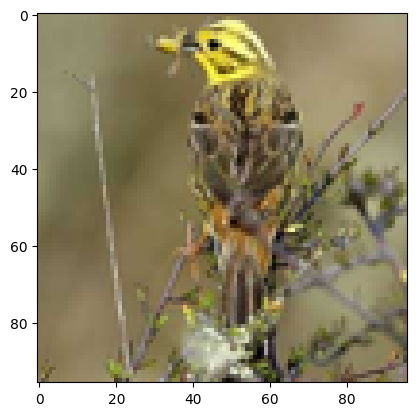

(5000, 96, 96, 3)
(5000,)
Saving images to disk
./img/2/0
./img/6/1
./img/2/2
./img/7/3
./img/4/4
./img/10/5
./img/8/6
./img/5/7
./img/6/8
./img/9/9
./img/1/10
./img/7/11
./img/1/12
./img/9/13
./img/8/14
./img/7/15
./img/5/16
./img/7/17
./img/3/18
./img/3/19
./img/2/20
./img/2/21
./img/7/22
./img/3/23
./img/2/24
./img/9/25
./img/6/26
./img/2/27
./img/6/28
./img/6/29
./img/1/30
./img/1/31
./img/1/32
./img/2/33
./img/4/34
./img/7/35
./img/8/36
./img/3/37
./img/2/38
./img/4/39
./img/2/40
./img/7/41
./img/2/42
./img/4/43
./img/8/44
./img/5/45
./img/4/46
./img/1/47
./img/7/48
./img/8/49
./img/7/50
./img/6/51
./img/9/52
./img/1/53
./img/7/54
./img/2/55
./img/4/56
./img/7/57
./img/9/58
./img/3/59
./img/3/60
./img/10/61
./img/10/62
./img/6/63
./img/2/64
./img/8/65
./img/9/66
./img/8/67
./img/9/68
./img/9/69
./img/10/70
./img/1/71
./img/6/72
./img/1/73
./img/3/74
./img/6/75
./img/6/76
./img/8/77
./img/9/78
./img/10/79
./img/6/80
./img/1/81
./img/9/82
./img/4/83
./img/3/84
./img/10/85
./img/7/86

In [54]:
# Use the following code if necessary

# download data if needed
download_and_extract()

# test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

labels = read_labels(LABEL_PATH)
print(labels.shape)

# save images to disk
save_images(images, labels)

#### **`Q2.1 Create the STL10_Dataset (5-pts)`**
In this Section, download STL-10 and extract 5 classes from STL-10 training dataset. The the labels of images will be defined as:

`{1: 'car', 2:'deer', 3:'horse', 4:'monkey', 5:'truck'}`

 Extract mentioned 5 classes of images from STL-10. Complement *`STL10_Dataset`* class and match each class with the label accordingly. __Hint__: You can use the code above to help to complement *`STL10_Dataset`* class. (5-pts)


In [68]:
class STL10_Dataset(Dataset):
    def __init__(self, root, train=True, transform=None, class_labels=None):
        self.root = root
        self.train = train
        self.transform = transform

        # Load labels and images from the STL-10 dataset
        if self.train:
            data_path = os.path.join(self.root, "stl10_binary", "train_X.bin")
            label_path = os.path.join(self.root, "stl10_binary", "train_y.bin")
        else:
            data_path = os.path.join(self.root, "stl10_binary", "test_X.bin")
            label_path = os.path.join(self.root, "stl10_binary", "test_y.bin")

        self.images = read_all_images(data_path)
        self.labels = read_labels(label_path)

        # Filter images and labels for the specified classes
        self.filtered_indices = [i for i, label in enumerate(self.labels) if label in class_labels]
        self.images = self.images[self.filtered_indices]
        self.labels = [class_labels[label] for label in self.labels[self.filtered_indices]]

    def __len__(self):
    
        return len(self.labels)

    

    def __getitem__(self, idx):
   
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [71]:
class_labels = {
    1: 'car',
    2: 'deer',
    3: 'horse',
    4: 'monkey',
    5: 'truck'
}

# Load STL-10 dataset and split into train and validation sets
train_set = STL10_Dataset('./data', True, transform_train, class_labels=class_labels)
val_set = STL10_Dataset('./data', False, transform_test, class_labels=class_labels)

# Create data loaders for training and validation sets
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0)



### 2.2 Fine-tuning ConvNet
You should load the pre-trained parameters and modify the output layer of pre-trained ConvNet from 100 to 5. You can either load the pre-trained parameters and then modify the output layer, or change the output layer firstly and then load the matched pre-trained parameters. The examples can be found at [link1](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) and [link2](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).


#### **`Q2.2  Finetuning from ConvNet (10-pts)`**
1. Load the pre-trained parameters (pretrained on CIFAR-100) and modify the ConvNet. (5-pts)
2. Train the model and show the results (settings of hyperparameters, accuracy, learning curve). (5-pts)

**Hint**:  Once the network is trained, it is a good practice to understand the feature space by visualization techniques. There are several techniques to visualize the feature space. [**t-sne**](https://lvdmaaten.github.io/tsne/) is a dimensionality reduction method which can help you better understand the feature learning process.

In [72]:
################################
# Load the pre-trained parameters (pretrained on CIFAR-100) and modify the ConvNet. (5-pts)
# Todo: finish the code
################################

two_layer_net.fc2 = nn.Linear(500, 5)  # Modify the last fully connected layer
two_layer_net = train(two_layer_net, train_data_loader, epochs=100)



Training on mps
[1,   200] loss: 0.072
[1,   400] loss: 0.066
[1,   600] loss: 0.057
[2,   200] loss: 0.049
[2,   400] loss: 0.049
[2,   600] loss: 0.049
[3,   200] loss: 0.044
[3,   400] loss: 0.044
[3,   600] loss: 0.045
[4,   200] loss: 0.042
[4,   400] loss: 0.043
[4,   600] loss: 0.042
[5,   200] loss: 0.038
[5,   400] loss: 0.039
[5,   600] loss: 0.039
[6,   200] loss: 0.039
[6,   400] loss: 0.038
[6,   600] loss: 0.040
[7,   200] loss: 0.037
[7,   400] loss: 0.038
[7,   600] loss: 0.040
[8,   200] loss: 0.036
[8,   400] loss: 0.037
[8,   600] loss: 0.036
[9,   200] loss: 0.038
[9,   400] loss: 0.035
[9,   600] loss: 0.036
[10,   200] loss: 0.035
[10,   400] loss: 0.037
[10,   600] loss: 0.036
[11,   200] loss: 0.036
[11,   400] loss: 0.034
[11,   600] loss: 0.034
[12,   200] loss: 0.035
[12,   400] loss: 0.036
[12,   600] loss: 0.036
[13,   200] loss: 0.035
[13,   400] loss: 0.034
[13,   600] loss: 0.032
[14,   200] loss: 0.035
[14,   400] loss: 0.035
[14,   600] loss: 0.033
[15

AttributeError: 'tuple' object has no attribute 'to'

In [73]:
################################
# Train the model and show the results (settings of hyperparameters, accuracy, learning curve). (5-pts)
# Todo: finish the code
################################
valid(two_layer_net, test_data_loader)
valid_class(two_layer_net, val_loader, class_labels)



Accuracy of the network on the 10000 test images: 3 %


AttributeError: 'tuple' object has no attribute 'to'

#  **3. Bonus (optional)**
Play with your code and try to get a higher accuracy on the test dataset (5 class from STL-10), as high as you can. The teams with the highest accuracy will get extra points, that will go on top of their average lab grade (weighed sum of all lab assignments) (your final grade can not exceed 10):

**1st place:** *5%*

**2nd and 3rd place:** *4%*

**4th and 5th place:** *3%*

**6th and 7th place:** *2%*

**8th-10th place:** *1%*.

You can adjust the hyperparameters and changing structures. Your strategies should be described and explained in your report.

**Note:** Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.

**Note:** The only data you can use is from CIFAR-100 and SLT-10.

**Hints**:
*   Data augmentation
*   Grid Search
*   Freezing early layers
*   Modifying Architecture
*   Modifying hyperparameters, *etc*.
*   [Other advice](https://cs231n.github.io/transfer-learning/)

In [ ]:
################################
# Todo: finish the code
################################

 # Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

 # -End of Notebook-